
## Example:

In [1]:
import numpy as np
from test_fitting_dm import interp_dTb, fit_param

cores = 24
N_v_streams = 24

# assumptions about the dark matter mass and rms stream velocity
m_chi_true = 0.05 # GeV
V_rms_true = 35000 # m/s

# sampling
N_observations = 50 # number of observations
z_sample = np.linspace(0, 1100, 300) # redshifts corresponding to these observations
dTb_accurate = interp_dTb(param=[m_chi_true, V_rms_true], z=z_sample, cores=cores, N_v_streams=N_v_streams, verbose=1)
noise = 1 # mK. std of the signal noise, assumed to be Gaussian and frequency-independent
dTb_sample = dTb_accurate + noise * np.random.normal(size=(N_observations, z_sample.shape[0]))

# fitting
fit_result = fit_param(z_sample, dTb_sample, cores=cores, N_v_streams=N_v_streams, save_name=f"m_chi{m_chi_true}-V_rms{V_rms_true}-N_v_stream{N_v_streams}.npy", verbose=0)

24 v_streams will be generated for m_chi = 0.05 GeV and V_rms = 35000 m/s...
Sampling 24 dTb's by 24 CPUs parallelly...
It costs 0:00:20.657576 to calculate dTb of 24 different initial_v_streams by 24 CPUs.
---------------------------------------------
Fitting starts...
kwargs = {'N_v_streams': 24, 'verbose': 0, 'bounds': array([[1.e-03, 1.e+04],
       [1.e+02, 1.e+05]])}
#1, res: [4.35278691e-02 3.56077880e+04], cost: 0:29:18.917150
#2, res: [5.19256437e-02 3.45645771e+04], cost: 0:17:51.904990
#3, res: [4.40351202e-02 3.51593539e+04], cost: 0:19:34.006835
#4, res: [5.39199420e-02 3.47656106e+04], cost: 0:16:46.088089
#5, res: [4.85274693e-02 3.50412915e+04], cost: 0:04:21.733630
#6, res: [5.41019650e-02 3.47283816e+04], cost: 0:11:45.889017
#7, res: [5.39167188e-02 3.47148901e+04], cost: 0:09:16.653511
#8, res: [4.58877731e-02 3.54398238e+04], cost: 0:11:49.760024
#9, res: [5.04362947e-02 3.49077588e+04], cost: 0:09:34.684287
#10, res: [4.96070814e-02 3.50450198e+04], cost: 0:13:59.

The time that the fitting process generally takes is proportional to $N_{observations}*\lceil\frac{N_{v_{streams}}}{cores}\rceil$.
## Analysis:

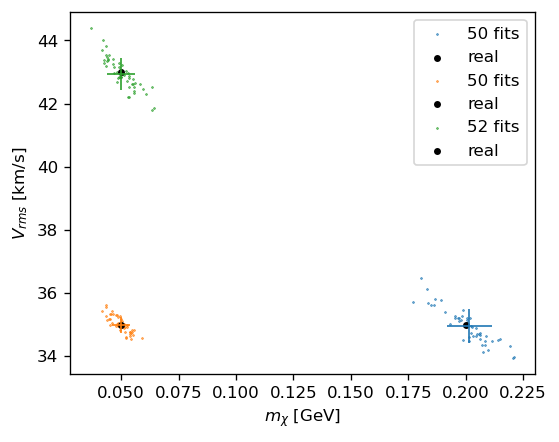

In [5]:
import os
import numpy as np
import matplotlib.pyplot as plt

fig = plt.figure(dpi=120, figsize=(5,4))
fit_median = {}
for filename in os.listdir():
    # one assumes all .npy file in current directory have m_chi*V_rms*.npy format.
    if ".npy" in filename:
        real_value = filename.split(sep="-")
        fit_data = np.load(filename)
        fit_median[filename] = np.median(fit_data, axis=0)
        plt.scatter(fit_data[:,0], fit_data[:,1]/1000, label=f'{fit_data.shape[0]} fits', s=0.2)
        plt.errorbar(fit_median[filename][0], fit_median[filename][1]/1000, xerr=np.std(fit_data[:,0]), yerr=np.std(fit_data[:,1])/1000, lw=1)
        plt.scatter(float(real_value[0][5:]), float(real_value[1][5:])/1000, c='k', label='real', s=10)
plt.xlabel(r"$m_{\chi}$ [GeV]")
plt.ylabel(r"$V_{rms}$ [km/s]")
plt.legend()
plt.show()

The distribution of scatter points from upper left to lower right comes from the degeneracy of the effects of m_chi and V_rms on dTb。

24 v_streams will be generated for m_chi = 0.20156128597891154 GeV and V_rms = 34944.43068580591 m/s...
Sampling 24 dTb's by 24 CPUs parallelly...
It costs 0:00:08.492435 to calculate dTb of 24 different initial_v_streams by 24 CPUs.
---------------------------------------------
24 v_streams will be generated for m_chi = 0.049968797917641555 GeV and V_rms = 34985.49211127436 m/s...
Sampling 24 dTb's by 24 CPUs parallelly...
It costs 0:00:09.618697 to calculate dTb of 24 different initial_v_streams by 24 CPUs.
---------------------------------------------
24 v_streams will be generated for m_chi = 0.04982713652709788 GeV and V_rms = 42923.57742184648 m/s...
Sampling 24 dTb's by 24 CPUs parallelly...
It costs 0:00:08.792660 to calculate dTb of 24 different initial_v_streams by 24 CPUs.
---------------------------------------------


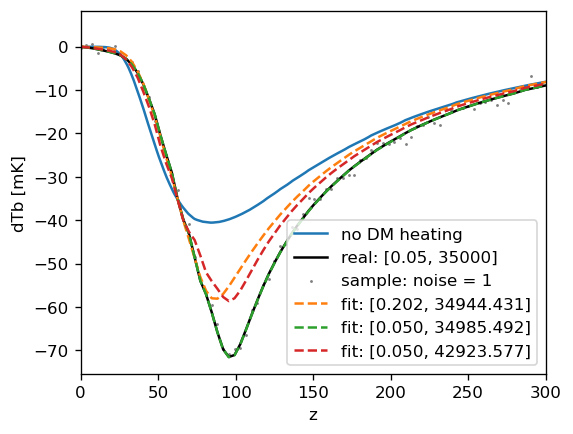

In [3]:
import ares
fig = plt.figure(dpi=120, figsize=(5,4))

pf = \
    {
        'radiative_transfer': False,
        'verbose': False,
        'dark_matter_heating': False,
        'include_cgm': False,
        'initial_redshift': 1010,
        'include_He': True
    }
sim = ares.simulations.Global21cm(**pf)
sim.run()
plt.plot(sim.history['z'], sim.history['dTb'], label="no DM heating")

plt.plot(z_sample, dTb_accurate, label=f'real: [{m_chi_true}, {V_rms_true}]', c='k')
plt.scatter(z_sample, dTb_sample[0], label=f'sample: noise = {noise}', s=0.5, c='grey')

for filename in os.listdir():
    # one assumes all .npy file in current directory have m_chi*V_rms*.npy format.
    if ".npy" in filename:
        dTb_fit = interp_dTb(param=fit_median[filename], z=z_sample, cores=cores, N_v_streams=N_v_streams, verbose=1)
        plt.plot(z_sample, dTb_fit, label=f'fit: [{fit_median[filename][0]:.3f}, {fit_median[filename][1]:.3f}]', linestyle='--')
plt.xlabel('z')
plt.ylabel('dTb [mK]')
plt.xlim(0,300)
plt.legend()
plt.show()

It can be seen from the figure that the fitted curve coincides with the noise-free curve to a very high degree.